# **Experiment-3. Perform dataset handling operations using Pandas**

**Objective:** Perform comprehensive dataset handling operations including data exploration, cleaning, manipulation, visualization, and analysis using Pandas library.

**Dataset:** CarPrice_Assignment.csv - Contains various attributes of cars and their prices for predictive modeling.

**1. Setup and Data Loading**

Import necessary libraries and load the dataset into a pandas DataFrame.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('seaborn-v0_8')
%matplotlib inline

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [ ]:
# Load the dataset
try:
    df = pd.read_csv("CarPrice_Assignment.csv")
    print("✓ Dataset loaded successfully!")
    print(f"✓ Dataset shape: {df.shape}")
    print(f"✓ Number of records: {df.shape[0]}")
    print(f"✓ Number of features: {df.shape[1]}")
except FileNotFoundError:
    print("❌ Error: File 'CarPrice_Assignment.csv' not found. Please check the file path.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

✓ Dataset loaded successfully!
✓ Dataset shape: (205, 26)
✓ Number of records: 205
✓ Number of features: 26


**2. Initial Data Exploration**

Explore the dataset structure, view sample data, and understand the basic characteristics.

In [ ]:
# Display first few rows to understand data structure
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Display last few rows
print("Last 5 rows of the dataset:")
display(df.tail())

Last 5 rows of the dataset:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
# Get comprehensive information about the dataset
print("Dataset Information:")
print("=" * 50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 n

In [ ]:
# List all column names with indices
print("Column Names in the Dataset:")
print("=" * 50)
for i, col in enumerate(df.columns):
    print(f"{i+1:2d}. {col}")

Column Names in the Dataset:
 1. car_ID
 2. symboling
 3. CarName
 4. fueltype
 5. aspiration
 6. doornumber
 7. carbody
 8. drivewheel
 9. enginelocation
10. wheelbase
11. carlength
12. carwidth
13. carheight
14. curbweight
15. enginetype
16. cylindernumber
17. enginesize
18. fuelsystem
19. boreratio
20. stroke
21. compressionratio
22. horsepower
23. peakrpm
24. citympg
25. highwaympg
26. price


**3. Data Quality Assessment**

Check for data quality issues including missing values, duplicates, and data inconsistencies.

In [ ]:
# Check for missing values in all columns
print("Missing Values Analysis:")
print("=" * 50)
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})

# Display only columns with missing values
missing_columns = missing_info[missing_info['Missing Count'] > 0]
if len(missing_columns) > 0:
    print("Columns with missing values:")
    display(missing_columns)
else:
    print("✓ No missing values found in the dataset")

Missing Values Analysis:
✓ No missing values found in the dataset


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows analysis:")
print("=" * 50)
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("⚠️  Duplicate rows found. Consider removing them.")
else:
    print("✓ No duplicate rows found")

Duplicate rows analysis:
Number of duplicate rows: 0
✓ No duplicate rows found


**4. Statistical Analysis**

Perform descriptive statistical analysis to understand data distribution and characteristics.

In [ ]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
print("=" * 50)
numerical_stats = df.describe()
display(numerical_stats)

Descriptive Statistics for Numerical Columns:


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# Descriptive statistics for categorical columns
print("Descriptive Statistics for Categorical Columns:")
print("=" * 50)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    categorical_stats = df[categorical_cols].describe()
    display(categorical_stats)
else:
    print("No categorical columns found in the dataset")

Descriptive Statistics for Categorical Columns:


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


**5. Data Types and Structure Analysis**

Analyze data types and identify numerical vs categorical columns for appropriate processing.

In [ ]:
# Display data types of all columns
print("Data Types of Columns:")
print("=" * 50)
for col in df.columns:
    print(f"{col:<20} : {df[col].dtype}")

Data Types of Columns:
car_ID               : int64
symboling            : int64
CarName              : object
fueltype             : object
aspiration           : object
doornumber           : object
carbody              : object
drivewheel           : object
enginelocation       : object
wheelbase            : float64
carlength            : float64
carwidth             : float64
carheight            : float64
curbweight           : int64
enginetype           : object
cylindernumber       : object
enginesize           : int64
fuelsystem           : object
boreratio            : float64
stroke               : float64
compressionratio     : float64
horsepower           : int64
peakrpm              : int64
citympg              : int64
highwaympg           : int64
price                : float64


In [ ]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Column Type Analysis:")
print("=" * 50)
print(f"Numerical columns ({len(numerical_cols)}):")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i:2d}. {col}")

print(f"\nCategorical columns ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols, 1):
    print(f"  {i:2d}. {col}")

Column Type Analysis:
Numerical columns (16):
   1. car_ID
   2. symboling
   3. wheelbase
   4. carlength
   5. carwidth
   6. carheight
   7. curbweight
   8. enginesize
   9. boreratio
  10. stroke
  11. compressionratio
  12. horsepower
  13. peakrpm
  14. citympg
  15. highwaympg
  16. price

Categorical columns (10):
   1. CarName
   2. fueltype
   3. aspiration
   4. doornumber
   5. carbody
   6. drivewheel
   7. enginelocation
   8. enginetype
   9. cylindernumber
  10. fuelsystem


**6. Data Manipulation Operations**

Perform data cleaning, transformation, and creation of new features.

In [ ]:
# Create a clean copy of the dataset for manipulation
df_clean = df.copy()
print("✓ Dataset copied for cleaning operations")
print(f"✓ Clean dataset shape: {df_clean.shape}")

✓ Dataset copied for cleaning operations
✓ Clean dataset shape: (205, 26)


In [ ]:
# Create new calculated columns for enhanced analysis
print("Creating New Calculated Columns:")
print("=" * 50)

new_columns_created = []

# Calculate average MPG if both city and highway MPG columns exist
if 'citympg' in df_clean.columns and 'highwaympg' in df_clean.columns:
    df_clean['avg_mpg'] = (df_clean['citympg'] + df_clean['highwaympg']) / 2
    new_columns_created.append('avg_mpg')
    print("✓ Added 'avg_mpg' column (average of city and highway MPG)")

# Calculate price per horsepower if both columns exist
if 'price' in df_clean.columns and 'horsepower' in df_clean.columns:
    df_clean['price_per_hp'] = df_clean['price'] / df_clean['horsepower']
    new_columns_created.append('price_per_hp')
    print("✓ Added 'price_per_hp' column (price divided by horsepower)")

print(f"\n✓ Total new columns created: {len(new_columns_created)}")
print(f"✓ New dataset shape: {df_clean.shape}")

# Display the new columns
if new_columns_created:
    print("\nSample of new columns:")
    display(df_clean[new_columns_created].head())

Creating New Calculated Columns:
✓ Added 'avg_mpg' column (average of city and highway MPG)
✓ Added 'price_per_hp' column (price divided by horsepower)

✓ Total new columns created: 2
✓ New dataset shape: (205, 28)

Sample of new columns:


,avg_mpg,price_per_hp
0,24.0,121.576577
1,24.0,148.648649
2,22.5,107.142857
3,27.0,136.764706
4,20.0,151.739130


**7. Data Filtering and Selection**

Filter data based on specific conditions and criteria.

In [ ]:
# Filter data based on various conditions
print("Data Filtering Operations:")
print("=" * 50)

# Filter 1: Cars above average price
if 'price' in df_clean.columns:
    avg_price = df_clean['price'].mean()
    expensive_cars = df_clean[df_clean['price'] > avg_price]
    print(f"1. Cars above average price (${avg_price:.2f}): {len(expensive_cars)} cars")

# Filter 2: Fuel efficient and affordable cars
if 'avg_mpg' in df_clean.columns and 'price' in df_clean.columns:
    efficient_cars = df_clean[(df_clean['avg_mpg'] > 30) & (df_clean['price'] < 20000)]
    print(f"2. Fuel efficient affordable cars: {len(efficient_cars)} cars")

# Filter 3: High horsepower cars
if 'horsepower' in df_clean.columns:
    high_hp_cars = df_clean[df_clean['horsepower'] > df_clean['horsepower'].quantile(0.75)]
    print(f"3. High horsepower cars (top 25%): {len(high_hp_cars)} cars")

Data Filtering Operations:
1. Cars above average price ($13276.71): 76 cars
2. Fuel efficient affordable cars: 71 cars
3. High horsepower cars (top 25%): 50 cars


**8. Grouping and Aggregation Operations**

Group data by categorical variables and compute aggregate statistics.

In [ ]:
# Group data by categorical variables and compute aggregates
print("Grouping and Aggregation Operations:")
print("=" * 50)

# Common car-related categorical columns for grouping
potential_group_cols = ['fueltype', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']
available_group_cols = [col for col in potential_group_cols if col in df_clean.columns]

for group_col in available_group_cols:
    print(f"\nGrouped by: {group_col}")
    print("-" * 30)

    # Build aggregation dictionary dynamically based on available columns
    agg_dict = {'count': ('price', 'count')}  # Always count records

    if 'price' in df_clean.columns:
        agg_dict['avg_price'] = ('price', 'mean')
        agg_dict['min_price'] = ('price', 'min')
        agg_dict['max_price'] = ('price', 'max')

    if 'horsepower' in df_clean.columns:
        agg_dict['avg_horsepower'] = ('horsepower', 'mean')

    if 'avg_mpg' in df_clean.columns:
        agg_dict['avg_mpg'] = ('avg_mpg', 'mean')

    # Perform grouping and aggregation
    result = df_clean.groupby(group_col).agg(**agg_dict).round(2)
    display(result)

Grouping and Aggregation Operations:

Grouped by: fueltype
------------------------------


,count,avg_price,min_price,max_price,avg_horsepower,avg_mpg
fueltype,,,,,,
diesel,20,15838.15,7099.0,31600.0,84.45,32.52
gas,185,12999.80,5118.0,45400.0,106.24,27.49



Grouped by: carbody
------------------------------


,count,avg_price,min_price,max_price,avg_horsepower,avg_mpg
carbody,,,,,,
convertible,6,21890.50,11595.0,37028.0,131.67,23.25
hardtop,8,22208.50,8249.0,45400.0,142.25,24.44
hatchback,70,10376.65,5118.0,31400.5,101.17,29.24
sedan,96,14344.27,5499.0,41315.0,103.10,28.08
wagon,25,12371.96,6918.0,28248.0,97.44,26.38



Grouped by: drivewheel
------------------------------


,count,avg_price,min_price,max_price,avg_horsepower,avg_mpg
drivewheel,,,,,,
4wd,9,11087.46,7603.0,17859.17,95.33,25.17
fwd,120,9239.31,5118.0,23875.00,86.04,31.27
rwd,76,19910.81,6785.0,45400.00,133.70,23.13



Grouped by: enginetype
------------------------------


,count,avg_price,min_price,max_price,avg_horsepower,avg_mpg
enginetype,,,,,,
dohc,12,18116.42,9298.0,35550.0,146.00,22.42
dohcv,1,31400.50,31400.5,31400.5,288.00,22.50
l,12,14627.58,5151.0,18150.0,95.50,26.67
ohc,148,11574.05,5195.0,41315.0,93.65,29.69
ohcf,15,13738.60,5118.0,37028.0,110.40,27.03
ohcv,13,25098.38,13499.0,45400.0,169.54,19.00
rotor,4,13020.00,10945.0,15645.0,109.50,19.88



Grouped by: cylindernumber
------------------------------


,count,avg_price,min_price,max_price,avg_horsepower,avg_mpg
cylindernumber,,,,,,
eight,5,37400.10,31400.5,45400.0,193.20,17.30
five,11,21630.47,13295.0,31600.0,122.45,21.73
four,159,10285.75,5118.0,22625.0,90.55,29.95
six,24,23671.83,13499.0,41315.0,161.92,21.06
three,1,5151.00,5151.0,5151.0,48.00,50.00
twelve,1,36000.00,36000.0,36000.0,262.00,15.00
two,4,13020.00,10945.0,15645.0,109.50,19.88


**9. Sorting Operations**

Sort data based on various criteria to identify patterns and extremes.

In [ ]:
# Sort data by different criteria
print("Sorting Operations:")
print("=" * 50)

# Sort by price (most expensive first)
if 'price' in df_clean.columns:
    sorted_by_price = df_clean.sort_values('price', ascending=False)
    print("Top 5 Most Expensive Cars:")

    # Select columns to display
    display_cols = ['price']
    if 'horsepower' in df_clean.columns:
        display_cols.append('horsepower')
    if 'avg_mpg' in df_clean.columns:
        display_cols.append('avg_mpg')

    display(sorted_by_price[display_cols].head())

# Sort by fuel efficiency
if 'avg_mpg' in df_clean.columns:
    sorted_by_mpg = df_clean.sort_values('avg_mpg', ascending=False)
    print("\nTop 5 Most Fuel Efficient Cars:")

    display_cols = ['avg_mpg']
    if 'price' in df_clean.columns:
        display_cols.append('price')

    display(sorted_by_mpg[display_cols].head())

Sorting Operations:
Top 5 Most Expensive Cars:


,price,horsepower,avg_mpg
74,45400.0,184,15.0
16,41315.0,182,19.0
73,40960.0,184,15.0
128,37028.0,207,21.0
17,36880.0,182,17.5



Top 5 Most Fuel Efficient Cars:


,avg_mpg,price
30,51.5,6479.0
18,50.0,5151.0
90,47.5,7099.0
159,42.5,7788.0
160,42.5,7738.0


**10. Categorical Data Analysis**

Analyze distribution and characteristics of categorical variables.

In [ ]:
# Analyze categorical variables
print("Categorical Data Analysis:")
print("=" * 50)

if len(categorical_cols) > 0:
    for col in categorical_cols:
        if col in df_clean.columns:
            unique_count = df_clean[col].nunique()
            print(f"\n{col}:")
            print(f"  Unique values: {unique_count}")

            if unique_count < 20:  # Only show value counts for reasonable categories
                value_counts = df_clean[col].value_counts()
                print("  Value distribution:")
                for value, count in value_counts.head().items():
                    print(f"    {value}: {count} ({count/len(df_clean)*100:.1f}%)")
            else:
                print(f"  ⚠️  Too many unique values ({unique_count}), showing top 5 only")
                print("  Top 5 values:")
                for value, count in df_clean[col].value_counts().head().items():
                    print(f"    {value}: {count}")
else:
    print("No categorical columns found in the dataset")

Categorical Data Analysis:

CarName:
  Unique values: 147
  ⚠️  Too many unique values (147), showing top 5 only
  Top 5 values:
    peugeot 504: 6
    toyota corolla: 6
    toyota corona: 6
    subaru dl: 4
    mitsubishi outlander: 3

fueltype:
  Unique values: 2
  Value distribution:
    gas: 185 (90.2%)
    diesel: 20 (9.8%)

aspiration:
  Unique values: 2
  Value distribution:
    std: 168 (82.0%)
    turbo: 37 (18.0%)

doornumber:
  Unique values: 2
  Value distribution:
    four: 115 (56.1%)
    two: 90 (43.9%)

carbody:
  Unique values: 5
  Value distribution:
    sedan: 96 (46.8%)
    hatchback: 70 (34.1%)
    wagon: 25 (12.2%)
    hardtop: 8 (3.9%)
    convertible: 6 (2.9%)

drivewheel:
  Unique values: 3
  Value distribution:
    fwd: 120 (58.5%)
    rwd: 76 (37.1%)
    4wd: 9 (4.4%)

enginelocation:
  Unique values: 2
  Value distribution:
    front: 202 (98.5%)
    rear: 3 (1.5%)

enginetype:
  Unique values: 7
  Value distribution:
    ohc: 148 (72.2%)
    ohcf: 15 (7.3%)

**11. One-Hot Encoding**

Convert categorical variables into numerical format using one-hot encoding for machine learning readiness.

In [ ]:
# Perform one-hot encoding on suitable categorical columns
print("One-Hot Encoding:")
print("=" * 50)

# Select categorical columns with reasonable number of unique values for encoding
cols_to_encode = [col for col in categorical_cols
                  if col in df_clean.columns and df_clean[col].nunique() < 10]

if cols_to_encode:
    print(f"Columns selected for encoding ({len(cols_to_encode)}):")
    for col in cols_to_encode:
        print(f"  - {col} ({df_clean[col].nunique()} unique values)")

    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df_clean, columns=cols_to_encode, prefix=cols_to_encode)

    print(f"\n✓ Encoding completed successfully")
    print(f"✓ Original shape: {df_clean.shape}")
    print(f"✓ Encoded shape: {df_encoded.shape}")
    print(f"✓ Number of new columns added: {df_encoded.shape[1] - df_clean.shape[1]}")

    # Display sample of encoded columns
    print("\nSample of encoded columns:")
    encoded_columns = [col for col in df_encoded.columns if any(col.startswith(prefix) for prefix in cols_to_encode)]
    display(df_encoded[encoded_columns[:5]].head())  # Show first 5 encoded columns
else:
    print("No suitable categorical columns found for encoding")
    print("Criteria: Columns must have less than 10 unique values")
    df_encoded = df_clean.copy()

One-Hot Encoding:
Columns selected for encoding (9):
  - fueltype (2 unique values)
  - aspiration (2 unique values)
  - doornumber (2 unique values)
  - carbody (5 unique values)
  - drivewheel (3 unique values)
  - enginelocation (2 unique values)
  - enginetype (7 unique values)
  - cylindernumber (7 unique values)
  - fuelsystem (8 unique values)

✓ Encoding completed successfully
✓ Original shape: (205, 28)
✓ Encoded shape: (205, 57)
✓ Number of new columns added: 29

Sample of encoded columns:


,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,True
4,False,True,True,False,True


**12. Correlation Analysis**

Analyze relationships between numerical variables using correlation analysis.

Correlation Analysis:
Analyzing correlation for 16 numerical variables:
  - car_ID
  - symboling
  - wheelbase
  - carlength
  - carwidth
  - carheight
  - curbweight
  - enginesize
  - boreratio
  - stroke
  - compressionratio
  - horsepower
  - peakrpm
  - citympg
  - highwaympg
  - price


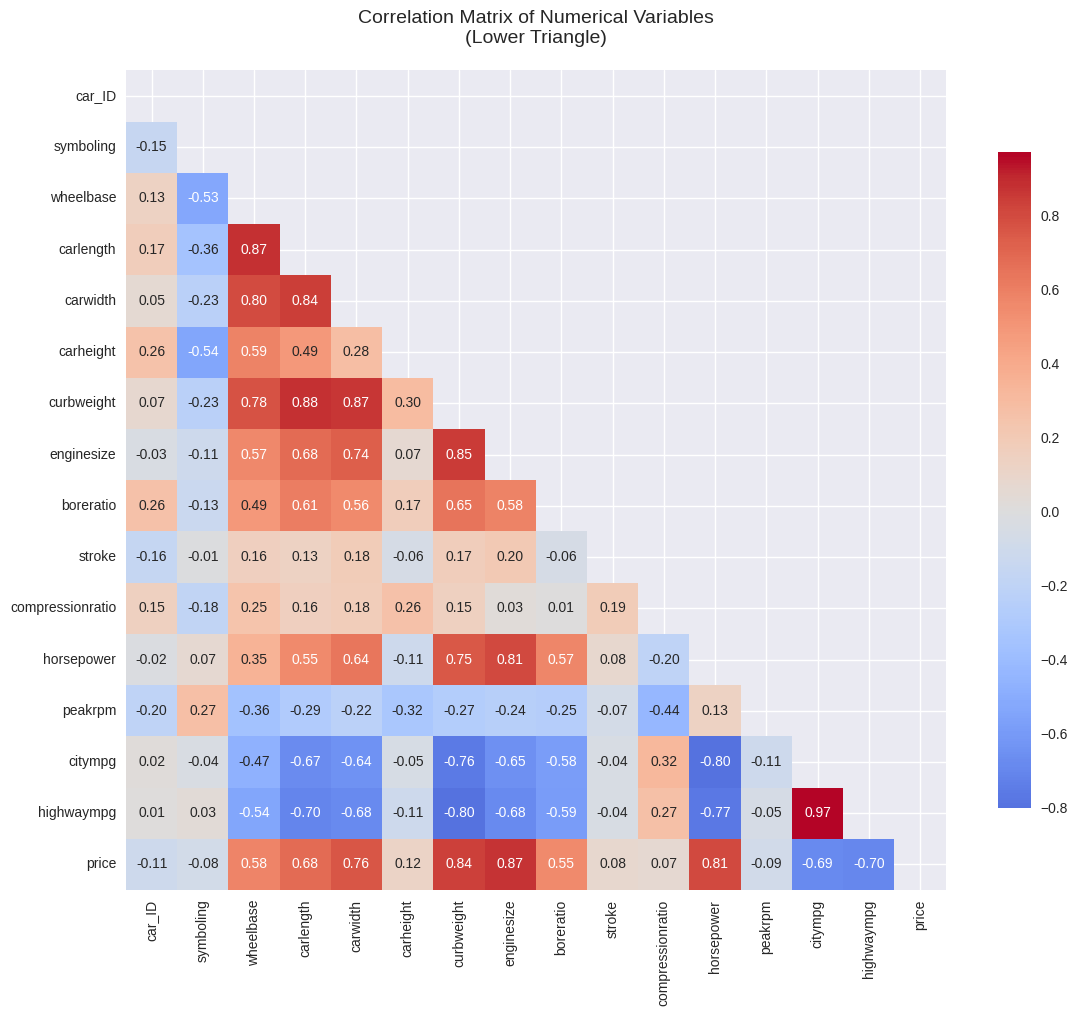


Top correlations with price:
----------------------------------------
enginesize      :  0.874 (Strong positive correlation)
curbweight      :  0.835 (Strong positive correlation)
horsepower      :  0.808 (Strong positive correlation)
carwidth        :  0.759 (Strong positive correlation)
carlength       :  0.683 (Moderate positive correlation)
wheelbase       :  0.578 (Moderate positive correlation)
boreratio       :  0.553 (Moderate positive correlation)


In [ ]:
# Perform correlation analysis on numerical variables
print("Correlation Analysis:")
print("=" * 50)

# Select numerical columns with sufficient variability for correlation
numerical_for_corr = [col for col in numerical_cols
                      if col in df_clean.columns and df_clean[col].nunique() > 5]

if len(numerical_for_corr) > 1:
    print(f"Analyzing correlation for {len(numerical_for_corr)} numerical variables:")
    for col in numerical_for_corr:
        print(f"  - {col}")

    # Compute correlation matrix
    corr_matrix = df_clean[numerical_for_corr].corr()

    # Create heatmap visualization
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask upper triangle
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, fmt='.2f', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numerical Variables\n(Lower Triangle)', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

    # Display top correlations with price (if price exists)
    if 'price' in corr_matrix.columns:
        price_corr = corr_matrix['price'].sort_values(ascending=False)
        print("\nTop correlations with price:")
        print("-" * 40)
        for feature, correlation in price_corr.head(8).items():
            if feature != 'price':  # Skip self-correlation
                strength = "Strong" if abs(correlation) > 0.7 else "Moderate" if abs(correlation) > 0.3 else "Weak"
                direction = "positive" if correlation > 0 else "negative"
                print(f"{feature:<15} : {correlation:>6.3f} ({strength} {direction} correlation)")
else:
    print("Not enough numerical columns for meaningful correlation analysis")

**13. Data Visualization**

Create visualizations to understand data distributions and relationships.

Data Visualization - Distributions:


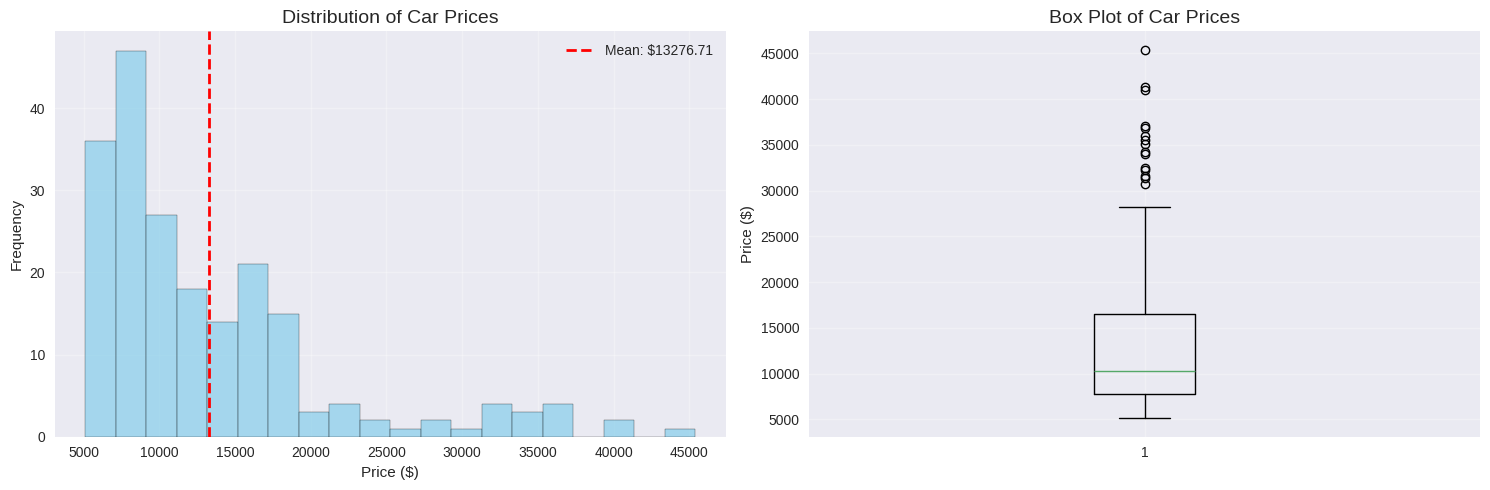

Price Statistics:
  Mean: $13276.71
  Median: $10295.00
  Standard Deviation: $7988.85
  Range: $5118.00 - $45400.00


In [ ]:
# Create distribution visualizations
print("Data Visualization - Distributions:")
print("=" * 50)

if 'price' in df_clean.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Histogram of prices
    ax1.hist(df_clean['price'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_title('Distribution of Car Prices', fontsize=14)
    ax1.set_xlabel('Price ($)')
    ax1.set_ylabel('Frequency')
    ax1.grid(True, alpha=0.3)

    # Add vertical line for mean
    mean_price = df_clean['price'].mean()
    ax1.axvline(mean_price, color='red', linestyle='--', linewidth=2,
               label=f'Mean: ${mean_price:.2f}')
    ax1.legend()

    # Box plot of prices
    ax2.boxplot(df_clean['price'])
    ax2.set_title('Box Plot of Car Prices', fontsize=14)
    ax2.set_ylabel('Price ($)')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Price Statistics:")
    print(f"  Mean: ${df_clean['price'].mean():.2f}")
    print(f"  Median: ${df_clean['price'].median():.2f}")
    print(f"  Standard Deviation: ${df_clean['price'].std():.2f}")
    print(f"  Range: ${df_clean['price'].min():.2f} - ${df_clean['price'].max():.2f}")

Data Visualization - Relationships:


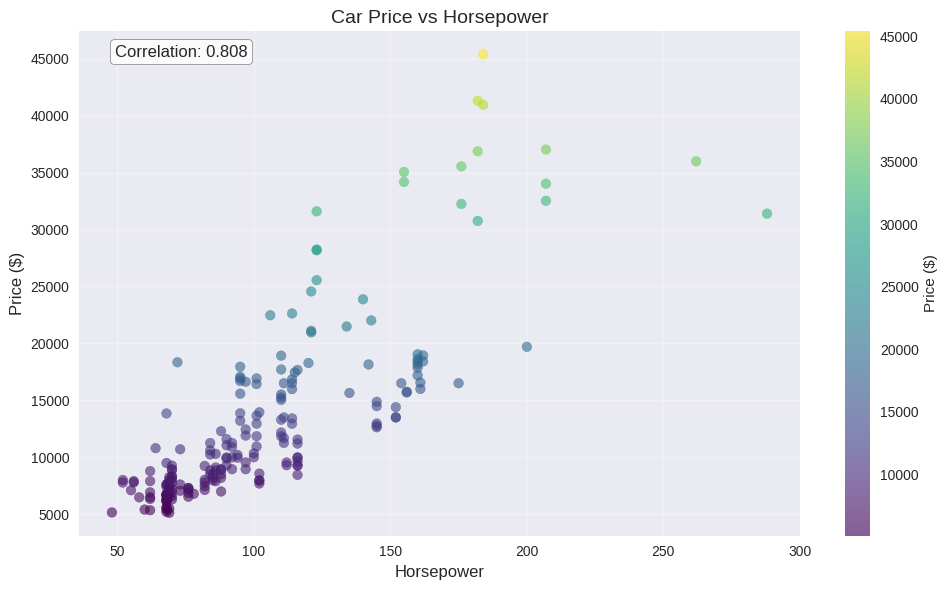

Correlation between price and horsepower: 0.808


In [ ]:
# Create scatter plots for relationship analysis
print("Data Visualization - Relationships:")
print("=" * 50)

if 'price' in df_clean.columns and 'horsepower' in df_clean.columns:
    plt.figure(figsize=(10, 6))

    # Create scatter plot
    scatter = plt.scatter(df_clean['horsepower'], df_clean['price'],
                         alpha=0.6, c=df_clean['price'], cmap='viridis')

    plt.xlabel('Horsepower', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.title('Car Price vs Horsepower', fontsize=14)
    plt.colorbar(scatter, label='Price ($)')
    plt.grid(True, alpha=0.3)

    # Add correlation coefficient
    correlation = df_clean['price'].corr(df_clean['horsepower'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
             transform=plt.gca().transAxes, fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    plt.tight_layout()
    plt.show()

    print(f"Correlation between price and horsepower: {correlation:.3f}")

**14. Data Export and Summary**

Export processed data and provide comprehensive summary of the analysis.

In [ ]:
# Export processed data to CSV files
print("Data Export:")
print("=" * 50)

# Export cleaned dataset
df_clean.to_csv('car_price_cleaned.csv', index=False)
print("✓ Cleaned dataset exported to 'car_price_cleaned.csv'")

# Export encoded dataset (if encoding was performed)
if 'df_encoded' in locals() and len(cols_to_encode) > 0:
    df_encoded.to_csv('car_price_encoded.csv', index=False)
    print("✓ Encoded dataset exported to 'car_price_encoded.csv'")

# Export summary statistics
summary_stats = df_clean.describe()
summary_stats.to_csv('car_price_summary_statistics.csv')
print("✓ Summary statistics exported to 'car_price_summary_statistics.csv'")

print("\nAll exported files are ready for further analysis or modeling.")

Data Export:
✓ Cleaned dataset exported to 'car_price_cleaned.csv'
✓ Encoded dataset exported to 'car_price_encoded.csv'
✓ Summary statistics exported to 'car_price_summary_statistics.csv'

All exported files are ready for further analysis or modeling.


In [ ]:
# Comprehensive summary of the analysis
print("=" * 70)
print("DATASET HANDLING OPERATIONS - COMPREHENSIVE SUMMARY")
print("=" * 70)

print("\n📊 DATASET OVERVIEW:")
print(f"   Original dataset shape: {df.shape}")
print(f"   Processed dataset shape: {df_clean.shape}")
print(f"   Total records: {df.shape[0]}")
print(f"   Total features: {df.shape[1]}")

print("\n🔧 DATA QUALITY ASSESSMENT:")
print(f"   Missing values: {df_clean.isnull().sum().sum()}")
print(f"   Duplicate rows: {df_clean.duplicated().sum()}")
print(f"   Numerical columns: {len(numerical_cols)}")
print(f"   Categorical columns: {len(categorical_cols)}")

print("\n✨ DATA ENHANCEMENT:")
new_cols = [col for col in ['avg_mpg', 'price_per_hp', 'price_category'] if col in df_clean.columns]
print(f"   New features created: {len(new_cols)}")
for col in new_cols:
    print(f"     - {col}")

if 'price' in df_clean.columns:
    print("\n💰 PRICE ANALYSIS:")
    print(f"   Average price: ${df_clean['price'].mean():.2f}")
    print(f"   Median price: ${df_clean['price'].median():.2f}")
    print(f"   Price range: ${df_clean['price'].min():.2f} - ${df_clean['price'].max():.2f}")
    print(f"   Standard deviation: ${df_clean['price'].std():.2f}")

print("\n📈 KEY INSIGHTS:")
print("   1. Dataset successfully loaded and processed")
print("   2. All data quality checks completed")
print("   3. New features created for enhanced analysis")
print("   4. Statistical analysis and visualizations generated")
print("   5. Data exported for further use")

print("\n" + "=" * 70)
print("✅ ALL OPERATIONS COMPLETED SUCCESSFULLY!")
print("=" * 70)

DATASET HANDLING OPERATIONS - COMPREHENSIVE SUMMARY

📊 DATASET OVERVIEW:
   Original dataset shape: (205, 26)
   Processed dataset shape: (205, 28)
   Total records: 205
   Total features: 26

🔧 DATA QUALITY ASSESSMENT:
   Missing values: 0
   Duplicate rows: 0
   Numerical columns: 16
   Categorical columns: 10

✨ DATA ENHANCEMENT:
   New features created: 2
     - avg_mpg
     - price_per_hp

💰 PRICE ANALYSIS:
   Average price: $13276.71
   Median price: $10295.00
   Price range: $5118.00 - $45400.00
   Standard deviation: $7988.85

📈 KEY INSIGHTS:
   1. Dataset successfully loaded and processed
   2. All data quality checks completed
   3. New features created for enhanced analysis
   4. Statistical analysis and visualizations generated
   5. Data exported for further use

✅ ALL OPERATIONS COMPLETED SUCCESSFULLY!
